In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from pandas import Series

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [4]:
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
       style="whitegrid")

In [6]:
# 전국 유휴지 데이터
df = pd.read_csv('unused_land.csv', encoding='cp949')

In [7]:
# 유휴지 총 개수
df.shape

(1431, 7)

In [8]:
# 필드 파악
df.columns

Index(['번호', '사업소', '시군', '소재지지번', '지목', '면적', '2020년공시가 '], dtype='object')

In [9]:
# 필요한 열만 추출
df = df[['시군', '소재지지번', '지목', '면적']]
df.head()

,시군,소재지지번,지목,면적
0,삼척,강원삼척시도계읍늑구리109,잡종지,106
1,삼척,강원삼척시도계읍늑구리115,잡종지,188
2,삼척,강원삼척시도계읍늑구리123,대지,268
3,삼척,강원삼척시도계읍늑구리124,대지,463
4,삼척,강원삼척시도계읍늑구리161,대지,397


In [10]:
# '지목' 값 종류
df['지목'].unique().tolist()

['잡종지', '대지', '임야', '전', '답']

In [11]:
# 지목 中 대지 & 잡종지만 추출
df = df[(df['지목']=='대지')|(df['지목']=='잡종지')]
df

,시군,소재지지번,지목,면적
0,삼척,강원삼척시도계읍늑구리109,잡종지,106
1,삼척,강원삼척시도계읍늑구리115,잡종지,188
2,삼척,강원삼척시도계읍늑구리123,대지,268
3,삼척,강원삼척시도계읍늑구리124,대지,463
4,삼척,강원삼척시도계읍늑구리161,대지,397
...,...,...,...,...
1391,보령,충남보령시성주면성주리202-2,잡종지,10
1392,보령,충남보령시성주면성주리228,잡종지,2711
1393,보령,충남보령시성주면성주리229,잡종지,3613
1394,보령,충남보령시성주면성주리230,잡종지,400


In [12]:
# 인덱스 리셋
df = df.reset_index(drop=True)
df

,시군,소재지지번,지목,면적
0,삼척,강원삼척시도계읍늑구리109,잡종지,106
1,삼척,강원삼척시도계읍늑구리115,잡종지,188
2,삼척,강원삼척시도계읍늑구리123,대지,268
3,삼척,강원삼척시도계읍늑구리124,대지,463
4,삼척,강원삼척시도계읍늑구리161,대지,397
...,...,...,...,...
696,보령,충남보령시성주면성주리202-2,잡종지,10
697,보령,충남보령시성주면성주리228,잡종지,2711
698,보령,충남보령시성주면성주리229,잡종지,3613
699,보령,충남보령시성주면성주리230,잡종지,400


In [13]:
# 유휴지 시군 파악
df["시군"].unique().tolist()

['삼척', '영월군', '정선군', '태백시', '평창군', '문경시', '봉화군', '화순', '보령']

In [14]:
# 시군 별 유휴지 개수 파악
data_list = [
    df[(df['시군']== '문경시')].shape[0],
    df[(df['시군']== '보령')].shape[0],
    df[(df['시군']== '봉화군')].shape[0],
    df[(df['시군']== '삼척')].shape[0],
    df[(df['시군']== '영월군')].shape[0],
    df[(df['시군']== '정선군')].shape[0],
    df[(df['시군']== '태백시')].shape[0],
    df[(df['시군']== '평창군')].shape[0],
    df[(df['시군']== '화순')].shape[0]
]
index_list = [
    '문경', '보령', '봉화', '삼척', '영월', '정선', '태백', '평창', '화순'
]
land_count = Series(data=data_list, index=index_list)
land_count

문경      6
보령      5
봉화      6
삼척    252
영월     65
정선    100
태백    231
평창      4
화순     32
dtype: int64

<AxesSubplot:>

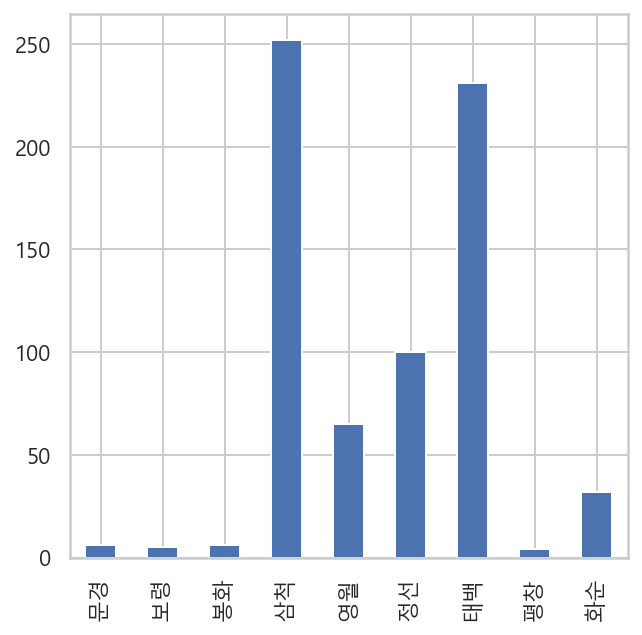

In [15]:
land_count.plot.bar(figsize=(5,5))

In [16]:
#df['면적'] = pd.to_numeric(df['면적'])
area_list = [
    df[(df['시군']== '문경시')]['면적'].sum(),
    df[(df['시군']== '보령')]['면적'].sum(),
    df[(df['시군']== '봉화군')]['면적'].sum(),
    df[(df['시군']== '삼척')]['면적'].sum(),
    df[(df['시군']== '영월군')]['면적'].sum(),
    df[(df['시군']== '정선군')]['면적'].sum(),
    df[(df['시군']== '태백시')]['면적'].sum(),
    df[(df['시군']== '평창군')]['면적'].sum(),
    df[(df['시군']== '화순')]['면적'].sum()
]
land_area = Series(data=area_list, index=index_list)
land_area

문경       730
보령      7255
봉화     12001
삼척    124946
영월     20897
정선     20634
태백     70801
평창       645
화순     18828
dtype: int64

In [17]:
# 각 지역 인구수
people_list = [71924, 99234, 31232, 64393, 38458, 36059, 42249, 41212, 62289]
index_list = ['문경', '보령', '봉화', '삼척', '영월','정선', '태백','평창','화순']
people = Series(data=people_list, index=index_list)
people

문경    71924
보령    99234
봉화    31232
삼척    64393
영월    38458
정선    36059
태백    42249
평창    41212
화순    62289
dtype: int64

In [18]:
area_m = [500, 60.88, 31085, 67.8, 2142]

In [19]:
area_m = {#'hotel': 500,
          'res' : 60.88,
         'park': 31085,
         'mart': 67.8}
#         'parkinglot' : 2142}
area_m = Series(area_m)
area_m.index[0]

'res'

In [67]:

# 문경시 유휴지 데이터

df_mk = df[(df['시군']=='문경시')]
df_mk = df_mk.reset_index(drop=True)


for i in range(df_mk.shape[0]):
    area_score = []       # '면적' 점수
    count_score = []      # '필요개수' 점수
    score = []
    for j in range(3):
        area_score.append(abs(area_m[j]-df_mk['면적'][i]))
        count_score.append(add.loc['문경','hotel':][j])
        
    area_score = Series(area_score, index=['hotel','park','mart'])
    area_score = area_score.rank(ascending=False)
    
    count_score = Series(count_score, index=['hotel', 'park', 'mart'])
    count_score = count_score.rank()

    #print(area_score)
    #print(count_score)
    for j in range(3):
        score.append(area_score[j]+count_score[j]*1.5)

    print(score)

[6.5, 2.5, 6.0]
[6.5, 2.5, 6.0]
[7.5, 2.5, 5.0]
[7.5, 2.5, 5.0]
[6.5, 2.5, 6.0]
[7.5, 2.5, 5.0]


In [136]:
df_br = df[(df['시군']=='보령')]
df_br = df_br.reset_index(drop=True)

for i in range(df_br.shape[0]):
    area_score = []       # '면적' 점수
    count_score = []      # '필요개수' 점수
    score = []
    for j in range(3):
        area_score.append(abs(area_m[j]-df_br['면적'][i]))
        count_score.append(add.loc['보령','restaurant':][j])
        
    area_score = Series(area_score, index=['res','park','mart'])
    area_score = area_score.rank(ascending=False)
    
    count_score = Series(count_score, index=['res', 'park', 'mart'])
    count_score = count_score.rank()

#    print(area_score)
#    print(count_score)
    for j in range(3):
        score.append(area_score[j]+count_score[j]*1.5)

    print(score)


[4.5, 4.0, 6.5]
[3.5, 4.0, 7.5]
[3.5, 4.0, 7.5]
[3.5, 4.0, 7.5]
[3.5, 4.0, 7.5]


In [137]:
df_bh = df[(df['시군']=='봉화군')]
df_bh = df_bh.reset_index(drop=True)


for i in range(df_bh.shape[0]):
    area_score = []       # '면적' 점수
    count_score = []      # '필요개수' 점수
    score = []
    for j in range(3):
        area_score.append(abs(area_m[j]-df_bh['면적'][i]))
        count_score.append(add.loc['봉화','hotel':][j])
        
    area_score = Series(area_score, index=['hotel','park','mart'])
    area_score = area_score.rank(ascending=False)
    
    count_score = Series(count_score, index=['hotel', 'park', 'mart'])
    count_score = count_score.rank()

    print(area_score)
#    print(count_score)
    for j in range(3):
        score.append(area_score[j]+count_score[j]*1.5)

    print(score)

hotel    2.0
park     1.0
mart     3.0
dtype: float64
[6.5, 2.5, 6.0]
hotel    2.0
park     1.0
mart     3.0
dtype: float64
[6.5, 2.5, 6.0]
hotel    2.0
park     1.0
mart     3.0
dtype: float64
[6.5, 2.5, 6.0]
hotel    2.0
park     1.0
mart     3.0
dtype: float64
[6.5, 2.5, 6.0]
hotel    2.0
park     1.0
mart     3.0
dtype: float64
[6.5, 2.5, 6.0]
hotel    2.0
park     1.0
mart     3.0
dtype: float64
[6.5, 2.5, 6.0]


In [134]:
df_hs = df[(df['시군']=='화순')]
df_hs = df_hs.reset_index(drop=True)


for i in range(df_hs.shape[0]):
    area_score = []       # '면적' 점수
    count_score = []      # '필요개수' 점수
    score = []
    for j in range(3):
        area_score.append(abs(area_m[j]-df_hs['면적'][i]))
        count_score.append(add.loc['화순','hotel':][j])
        
    area_score = Series(area_score, index=['hotel','mart','parkinglot'])
    area_score = area_score.rank(ascending=False)
    
    count_score = Series(count_score, index=['hotel', 'mart', 'parkinglot'])
    count_score = count_score.rank()

#    print(area_score)
#    print(count_score)
    for j in range(3):
        score.append(area_score[j]+count_score[j]*1.5)

    print(score)

[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[7.5, 4.0, 3.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[7.5, 4.0, 3.5]
[7.5, 4.0, 3.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]
[6.5, 4.0, 4.5]


In [70]:
df_mk = df[(df['시군']=='문경시')]
df_mk = df_mk.reset_index(drop=True)

area_score = []
for i in range(df_mk.shape[0]):
    for j in range(2):
        if abs(area_m.index[j] - df_mk['면적'][i]) > abs(area_m.index[j+1] - df_mk['면적'][i]):
            area_score.append(j+1,j)
            area_score.append(j,j+1)
        else:
            area_score.append(j+1,j)
            area_score.append(j,j+1)
area_score

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [21]:
import folium

In [22]:
unused_land = pd.DataFrame(land_count)
unused_land['위도'] = [36.6918,36.3319,36.9345,37.2814,37.1880,37.3810,37.1740,37.5617,35.0126]
unused_land['경도'] = [128.1502,126.6120,128.9193,129.1597,128.5194,128.7345,128.9788,128.4795,127.0342]
print(unused_land["위도"][8])
unused_land


35.0126


,0,위도,경도
문경,6,36.6918,128.1502
보령,5,36.3319,126.6120
봉화,6,36.9345,128.9193
삼척,252,37.2814,129.1597
영월,65,37.1880,128.5194
정선,100,37.3810,128.7345
태백,231,37.1740,128.9788
평창,4,37.5617,128.4795
화순,32,35.0126,127.0342


In [23]:
center = [37, 127]
m = folium.Map(location = center, zoom_start = 7)
for i in range(9):
    sub_lat = unused_land["위도"][i]
    sub_long = unused_land["경도"][i]
    count = unused_land[0][i]
    
    folium.CircleMarker(
        radius = np.sqrt(count),
        location = [sub_lat, sub_long],
        color = 'crimson',
        fill = True).add_to(m)
m

# 숙박시설

In [24]:
# 지역별 숙박시설 데이터
mk_hotel = pd.read_csv('문경숙박.csv', encoding='cp949')
br_hotel = pd.read_csv('보령숙박.csv', encoding='cp949')
bh_hotel = pd.read_csv('봉화숙박.csv', encoding='cp949')
sc_hotel = pd.read_csv('삼척숙박.csv', encoding='cp949')
yw_hotel = pd.read_csv('영월숙박.csv', encoding='cp949')
js_hotel = pd.read_csv('정선숙박.csv', encoding='cp949')
tb_hotel = pd.read_csv('태백숙박.csv', encoding='cp949')
pc_hotel = pd.read_csv('평창숙박.csv', encoding='cp949')
hs_hotel = pd.read_csv('화순숙박.csv', encoding='cp949')

In [25]:
print(mk_hotel.columns.tolist(), "\n",
      br_hotel.columns.tolist(), "\n",
      bh_hotel.columns.tolist(), "\n",
      sc_hotel.columns.tolist(), "\n",
      yw_hotel.columns.tolist(), "\n",
      js_hotel.columns.tolist(), "\n",
      tb_hotel.columns.tolist(), "\n",
      pc_hotel.columns.tolist(), "\n",
      hs_hotel.columns.tolist())

['업종명', '업소명', '영업소 주소(도로명)', '소재지전화', '객실수'] 
 ['연번', '업종명', '업소명', '객실수', '영업소 주소(도로명)', '영업소 주소(지번)'] 
 ['연번', '업종명', '업소명', '객실수', '영업소 주소(지번)'] 
 ['연번', '업종명', '업소명', '객실수', '영업소 주소(도로명)', '영업소 주소(지번)', '소재지전화'] 
 ['상호명', '주소', '전화번호', '객실수'] 
 ['순번', '업종명', '신고일자', '업소명', '업소소재지(지번)', '소재지전화', '객실수'] 
 ['번호', '업소명', '업소소재지(지번)', '소재지전화', '우편번호', '행정동명', '업태명', '객실수', '한실수', '양실수'] 
 ['연번', '업종명', '업소명', '객실수', '영업소 주소(지번)'] 
 ['업소명', '업종명', '소재지도로명주소', '전화번호', '객실수', '부대시설', '주차장보유여부', '결제방법', '홈페이지주소', '주변관광정보', '위도', '경도', '데이터기준일자']


In [26]:
mk_hotel = mk_hotel[['업소명','객실수']]
br_hotel = br_hotel[['업소명', '객실수']]
bh_hotel = bh_hotel[['업소명', '객실수']]
sc_hotel = sc_hotel[['업소명', '객실수']]
yw_hotel = yw_hotel[['상호명', '객실수']]
js_hotel = js_hotel[['업소명', '객실수']]
tb_hotel = tb_hotel[['업소명', '객실수']]
pc_hotel = pc_hotel[['업소명', '객실수']]
hs_hotel = hs_hotel[['업소명', '객실수']]

yw_hotel.columns = ['업소명','객실수']

mk_hotel['시군'] = '문경_1'
br_hotel['시군'] = '보령_2'
bh_hotel['시군'] = '봉화_3'
sc_hotel['시군'] = '삼척_4'
yw_hotel['시군'] = '영월_5'
js_hotel['시군'] = '정선_6'
tb_hotel['시군'] = '태백_7'
pc_hotel['시군'] = '평창_8'
hs_hotel['시군'] = '화순_9'

hotel = pd.concat([mk_hotel, br_hotel, bh_hotel, sc_hotel, yw_hotel,
                  js_hotel, tb_hotel, pc_hotel, hs_hotel])

hotel = hotel.reset_index(drop=True)

hotel

,업소명,객실수,시군
0,(주)문경레저타운 문경새재리조트,66.0,문경_1
1,E(이),17.0,문경_1
2,G모텔,18.0,문경_1
3,IMT 모텔,27.0,문경_1
4,k2모텔,NaN,문경_1
...,...,...,...
1435,(주)드라이브인궁펜션,24.0,화순_9
1436,테마모텔,21.0,화순_9
1437,화순온천모텔,22.0,화순_9
1438,모텔마루,13.0,화순_9


In [27]:
hotel.isna().sum()

업소명      0
객실수    549
시군       0
dtype: int64

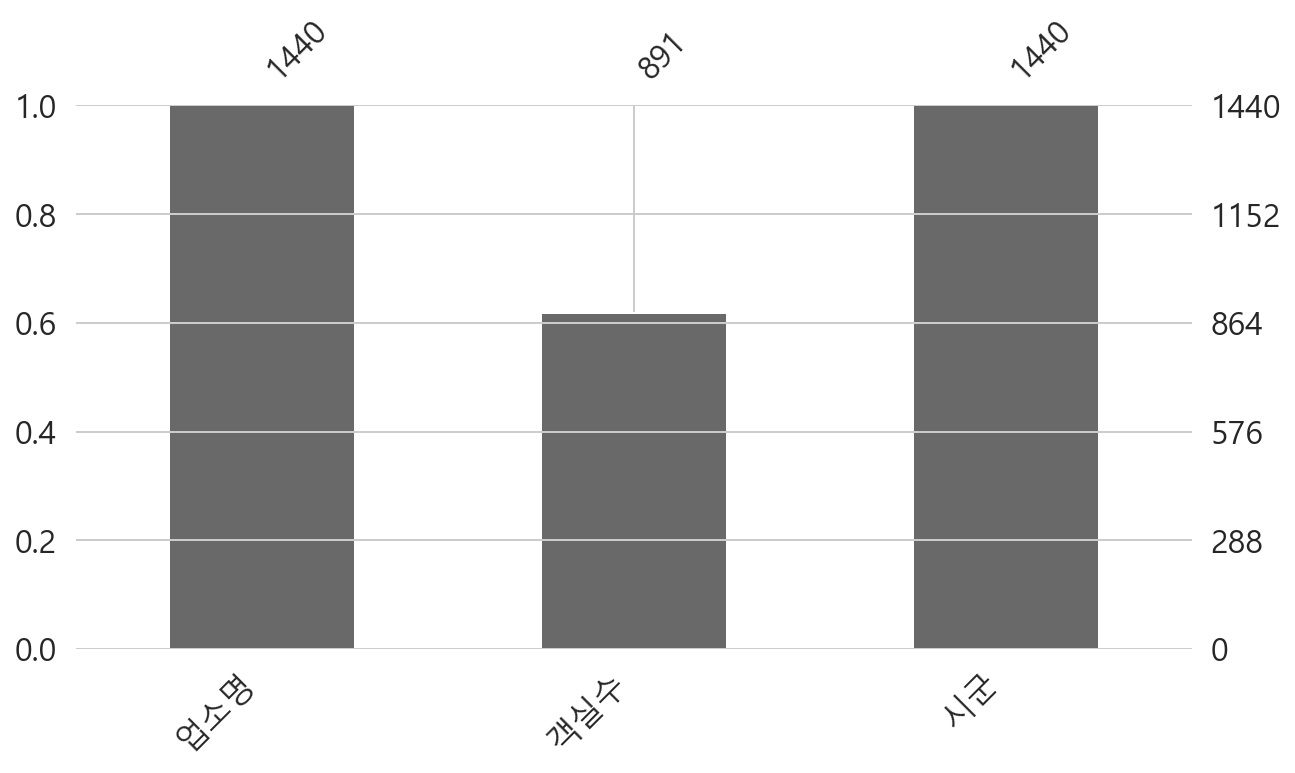

In [28]:
import missingno as msno
msno.bar(hotel, figsize=(10,5))
plt.show()

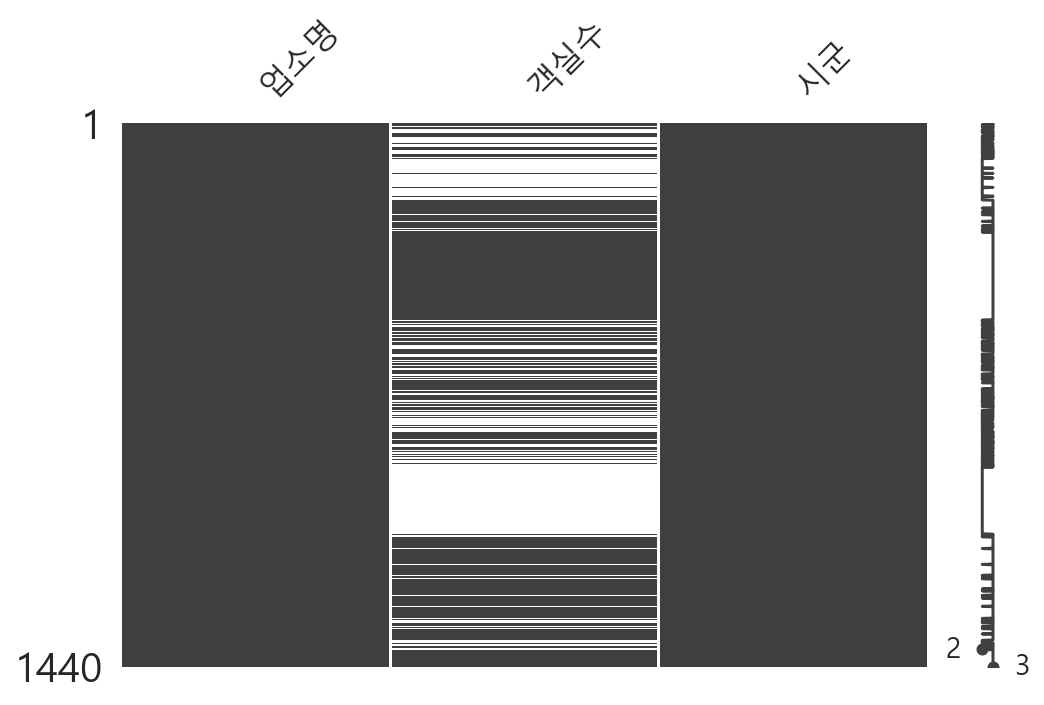

In [29]:
msno.matrix(hotel, figsize=(8,5))
plt.show()

In [30]:
# 객실수 결측치 평균값으로 대체
hotel = hotel.fillna(int(hotel['객실수'].mean()))
hotel

,업소명,객실수,시군
0,(주)문경레저타운 문경새재리조트,66.0,문경_1
1,E(이),17.0,문경_1
2,G모텔,18.0,문경_1
3,IMT 모텔,27.0,문경_1
4,k2모텔,25.0,문경_1
...,...,...,...
1435,(주)드라이브인궁펜션,24.0,화순_9
1436,테마모텔,21.0,화순_9
1437,화순온천모텔,22.0,화순_9
1438,모텔마루,13.0,화순_9


In [31]:
# 지역별 방문자 데이터
tourist_1 = pd.read_csv('강원도 관광객.csv', encoding='cp949')
tourist_2= pd.read_csv('경상북도 관광객.csv', encoding='cp949')
tourist_3 = pd.read_csv('전라남도 관광객.csv', encoding='cp949')
tourist_4 = pd.read_csv('충청남도 관광객.csv', encoding='cp949')

In [32]:
tourist_1 = tourist_1[(tourist_1['구분']== '외부방문자(b+c)')]
tourist_2 = tourist_2[(tourist_2['구분']== '외부방문자(b+c)')]
tourist_3 = tourist_3[(tourist_3['구분']== '외부방문자(b+c)')]
tourist_4 = tourist_4[(tourist_4['구분']== '외부방문자(b+c)')]

tourist = pd.concat([tourist_1, tourist_2, tourist_3, tourist_4])
tourist = tourist.reset_index(drop=True)
tourist

,지역,구분,2018,2019,2020
0,춘천시,외부방문자(b+c),26684111,30513697,26834466
1,원주시,외부방문자(b+c),29707426,30608425,27405505
2,강릉시,외부방문자(b+c),31662185,32299061,31244271
3,동해시,외부방문자(b+c),10110320,10790192,10324270
4,태백시,외부방문자(b+c),5058337,5283704,4824126
...,...,...,...,...,...
75,서천군,외부방문자(b+c),8275092,9185177,8949365
76,청양군,외부방문자(b+c),4495412,4626416,4172468
77,홍성군,외부방문자(b+c),11385314,11919333,11017075
78,예산군,외부방문자(b+c),11857550,14116505,12588950


In [33]:
room = []                   # 객실 수 리스트
room_need = []              # 적정 객실 수 리스트
for i in range(1,10):      # 시군 별로 숙박업소의 총 객실 수 & 적정 객실 수 구하기
    i = str(i)
    a = hotel[(hotel['시군'].str.contains(i))]
    room.append(a["객실수"].sum())
    a = a.reset_index(drop=True)
    for j in range(80):
        if a['시군'][0][:2] in tourist['지역'][j]:
            room_need.append(int(tourist['2019'][j]/365/4.32*0.5))
        else:
            continue
print("객실 수: ",room)
print("적정 객실 수: ",room_need)

객실 수:  [2338.0, 5330.0, 982.0, 2630.0, 3472.0, 11348.0, 2064.0, 6781.0, 1434.0]
적정 객실 수:  [3540, 5041, 1315, 3611, 1959, 2863, 1675, 4532, 3694]


In [34]:
# 시군 별로 추가로 필요한 숙박시설 수
hotel_add = []
for i in range(9):
    if room[i]-room_need[i]>= 0:
        hotel_add.append(0)
    else:
        hotel_add.append(round((room_need[i]-room[i])/round(hotel['객실수'].mean())))

hotel_add = Series(data=hotel_add, index=index_list)
hotel_add

문경    48.0
보령     0.0
봉화    13.0
삼척    39.0
영월     0.0
정선     0.0
태백     0.0
평창     0.0
화순    90.0
dtype: float64

<AxesSubplot:>

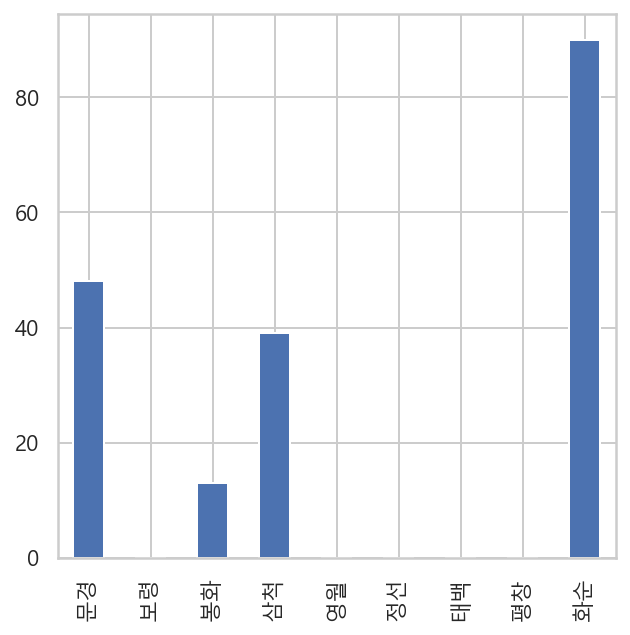

In [35]:
hotel_add.plot.bar(figsize=(5,5))

# 음식점

In [36]:
# 지역별 모범음식점 데이터
gangwon_res = pd.read_csv("강원도_음식점.csv", encoding='cp949')
mk_res = pd.read_csv("문경_음식점.csv", encoding='cp949')
br_res = pd.read_csv("보령_음식점.csv",encoding='cp949')
bh_res = pd.read_csv("봉화_음식점.csv", encoding='cp949')
jeonnam_res = pd.read_csv("전라남도_음식점.csv", encoding='cp949')

In [37]:
print(gangwon_res.columns.tolist(), "\n",
      mk_res.columns.tolist(), "\n",
      br_res.columns.tolist(), "\n",
      bh_res.columns.tolist(), "\n",
      jeonnam_res.columns.tolist())

['시군구명', '업소명', '식당업종', '업태', '주요메뉴', '대표자명', '연락처', '소재지도로명주소', '경도', '위도', '홈페이지주소', '최대수용인원', '운영시간', '주차장보유여부'] 
 ['식당업종', '업소명', '소재지', '연락처'] 
 ['연번', '업태', '업소명', '주취급음식', '소재지', '전화번호'] 
 ['식당업종', '업소명', '소재지', '연락처'] 
 ['연번', '시군구', '업소명', '주소', '전화번호', '기준일']


In [38]:
gangwon_res = gangwon_res[['업소명', '시군구명']]
mk_res = mk_res[['업소명']]
br_res = br_res[['업소명']]
bh_res = bh_res[['업소명']]
jeonnam_res = jeonnam_res[['업소명', '시군구']]

sc_res = gangwon_res[(gangwon_res['시군구명']== '삼척시')]
yw_res = gangwon_res[(gangwon_res['시군구명']== '영월군')]
js_res = gangwon_res[(gangwon_res['시군구명']== '정선군')]
tb_res = gangwon_res[(gangwon_res['시군구명']== '태백시')]
pc_res = gangwon_res[(gangwon_res['시군구명']== '평창군')]
hs_res = jeonnam_res[(jeonnam_res['시군구']== '화순군')]

mk_res['시군'] = '문경_1'
br_res['시군'] = '보령_2'
bh_res['시군'] = '봉화_3'
sc_res['시군'] = '삼척_4'
yw_res['시군'] = '영월_5'
js_res['시군'] = '정선_6'
tb_res['시군'] = '태백_7'
pc_res['시군'] = '평창_8'
hs_res['시군'] = '화순_9'

sc_res = sc_res[['업소명', '시군']]
yw_res = yw_res[['업소명', '시군']]
js_res = js_res[['업소명', '시군']]
tb_res = tb_res[['업소명', '시군']]
pc_res = pc_res[['업소명', '시군']]

mk_res = mk_res[['업소명', '시군']]
br_res = br_res[['업소명', '시군']]
bh_res = bh_res[['업소명', '시군']]
hs_res = hs_res[['업소명', '시군']]

res = pd.concat([mk_res, br_res, bh_res, sc_res, yw_res,
                  js_res, tb_res, pc_res, hs_res])

res = res.reset_index(drop=True)

res

C:\Users\n_yeo\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\n_yeo\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\n_yeo\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,업소명,시군
0,털보식육식당,문경_1
1,그린가든,문경_1
2,왕쭈꾸미,문경_1
3,청요리식당,문경_1
4,송정송어장모전점,문경_1
...,...,...
372,전원,화순_9
373,쭈꾸味사랑,화순_9
374,초향,화순_9
375,행복한임금님,화순_9


In [39]:
# 각 지역 인구수
people_list = [71924, 99234, 31232, 64393, 38458, 36059, 42249, 41212, 62289]
index_list = ['문경', '보령', '봉화', '삼척', '영월','정선', '태백','평창','화순']
people = Series(data=people_list, index=index_list)
people

문경    71924
보령    99234
봉화    31232
삼척    64393
영월    38458
정선    36059
태백    42249
평창    41212
화순    62289
dtype: int64

In [40]:
res_count = []     # 음식점 수 리스트 
res_need = []      # 적정 음식점 수 리스트
for i in range(1,10):    # 시군 별로 현재 음식점 수 & 음식점 적정 개수 구하기
    i = str(i)
    a = res[(res['시군'].str.contains(i))]
    res_count.append(a.shape[0])
    a = a.reset_index(drop=True)
    i = int(i)
    res_need.append(int(3816/(9598484/people[i-1])))

print("음식점 현황: ",res_count)
print("음식점 적정 수",res_need)

음식점 현황:  [48, 34, 34, 65, 32, 45, 29, 58, 32]
음식점 적정 수 [28, 39, 12, 25, 15, 14, 16, 16, 24]


In [41]:
# 시군 별로 추가로 필요한 음식점 수
res_add = []
for i in range(9):
    if res_count[i]-res_need[i]>= 0:
        res_add.append(0)
    else:
        res_add.append(res_need[i]-res_count[i])

res_add = Series(data=res_add, index=index_list)
res_add

문경    0
보령    5
봉화    0
삼척    0
영월    0
정선    0
태백    0
평창    0
화순    0
dtype: int64

<AxesSubplot:>

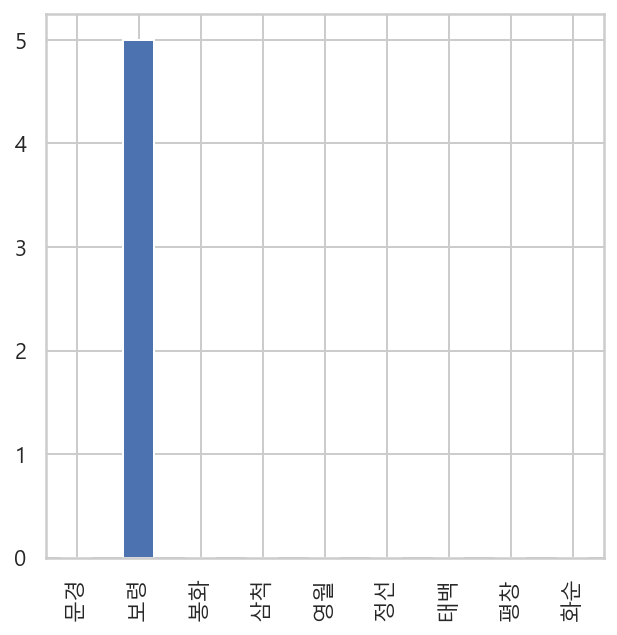

In [42]:
res_add.plot.bar(figsize=(5,5))

# 공원

In [43]:
# 지역별 공원 데이터
mk_park = pd.read_csv("문경공원.csv", encoding='cp949')
br_park = pd.read_csv("보령공원.csv", encoding='cp949')
bh_park = pd.read_csv("봉화공원.csv",encoding='cp949')
sc_park = pd.read_csv("삼척공원.csv", encoding='cp949')
yw_park = pd.read_csv("영월공원.csv", encoding='cp949')
js_park = pd.read_csv("정선공원.csv", encoding='cp949')
tb_park = pd.read_csv("태백공원.csv",encoding='cp949')
pc_park = pd.read_csv("평창공원.csv", encoding='cp949')
hs_park = pd.read_csv("화순공원.csv", encoding='cp949')

In [44]:
mk_park['시군'] = '문경_1'
br_park['시군'] = '보령_2'
bh_park['시군'] = '봉화_3'
sc_park['시군'] = '삼척_4'
yw_park['시군'] = '영월_5'
js_park['시군'] = '정선_6'
tb_park['시군'] = '태백_7'
pc_park['시군'] = '평창_8'
hs_park['시군'] = '화순_9'

park = pd.concat([mk_park, br_park, bh_park, sc_park, yw_park,
                  js_park, tb_park, pc_park, hs_park])

park = park.reset_index(drop=True)

park = park[['공원명', '소재지지번주소', '위도', '경도', '공원면적', '시군']]



park

,공원명,소재지지번주소,위도,경도,공원면적,시군
0,동부공원,경상북도 문경시 흥덕동 769,36.604351,128.207388,1787.0,문경_1
1,영신공원,경상북도 문경시 영신동 493-5,36.591918,128.209874,2400.0,문경_1
2,하리1어린이공원,경상북도 문경시 문경읍 하리 349-1,36.732417,128.110069,1860.0,문경_1
3,1보양공원어린이,경상북도 문경시 문경읍 하리 388,36.730767,128.112042,3239.0,문경_1
4,2보양공원어린이,경상북도 문경시 문경읍 하리 396-3,36.728177,128.107858,2416.0,문경_1
...,...,...,...,...,...,...
219,광덕제3어린이공원,전라남도 화순군 화순읍 일심리 780,35.056584,126.993765,1629.0,화순_9
220,신기제1어린이공원,전라남도 화순군 화순읍 신기리 405-1,35.065443,126.990813,4042.0,화순_9
221,신기제2어린이공원,전라남도 화순군 화순읍 일심리 873-1,35.061289,126.998027,2341.0,화순_9
222,연양체육공원,전라남도 화순군 화순읍 강정리 253-2,35.045417,126.968316,148674.0,화순_9


In [45]:
park_area = []      # 공원 면적 리스트
park_need = []      # 적정 공원 면적 리스트
for i in range(1,10):
    i = str(i)
    a = park[(park['시군'].str.contains(i))]
    park_area.append(a["공원면적"].sum())
    a = a.reset_index(drop=True)
    i = int(i)
    park_need.append(people[i-1]*6)

print("공원 현재 면적: ",park_area)
print("공원 적정 면적: ",park_need)

공원 현재 면적:  [70736.0, 135155.5, 114997.9, 642178.0, 1177210.0, 449423.3, 2649013.0, 1297094.0, 427327.0]
공원 적정 면적:  [431544, 595404, 187392, 386358, 230748, 216354, 253494, 247272, 373734]


In [46]:
# 값이 양수면 부족하다는 뜻
for i in range(9):
    print(park_need[i] - park_area[i])
    

360808.0
460248.5
72394.1
-255820.0
-946462.0
-233069.3
-2395519.0
-1049822.0
-53593.0


In [47]:
# 공원 면적 평균
park_area_m = round(park['공원면적'].mean())
park_area_m

31085

In [48]:
# 시군 별로 추가로 필요한 공원 수
park_add = []
for i in range(9):
    if park_area[i]-park_need[i]>= 0:
        park_add.append(0)
    else:
        park_add.append(round((park_need[i]-park_area[i])/park_area_m))

park_add = Series(data=park_add, index=index_list)
park_add

문경    12.0
보령    15.0
봉화     2.0
삼척     0.0
영월     0.0
정선     0.0
태백     0.0
평창     0.0
화순     0.0
dtype: float64

<AxesSubplot:>

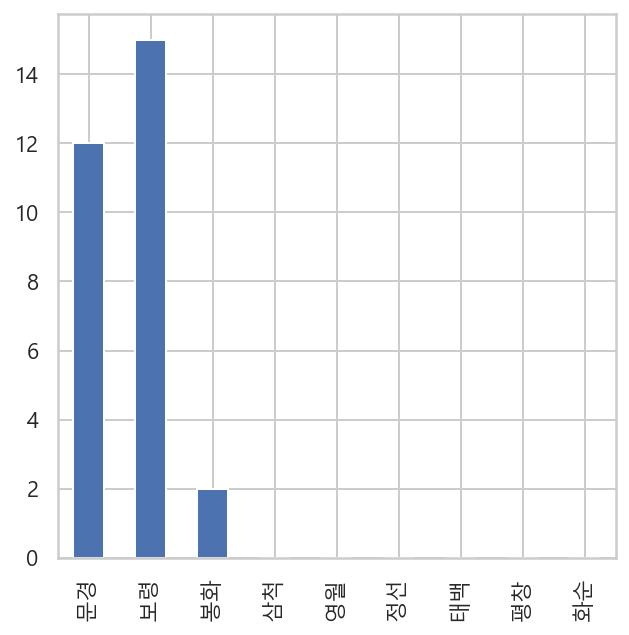

In [49]:
park_add.plot.bar(figsize=(5,5))

# 편의점

In [50]:
# 지역별 편의점 데이터
mk_mart = pd.read_csv("문경편의점.csv", encoding='cp949')
br_mart = pd.read_csv("보령편의점.csv", encoding='cp949')
bh_mart = pd.read_csv("봉화편의점.csv",encoding='cp949')
sc_mart = pd.read_csv("삼척편의점.csv", encoding='cp949')
yw_mart = pd.read_csv("영월편의점.csv", encoding='cp949')
js_mart = pd.read_csv("정선편의점.csv", encoding='cp949')
tb_mart = pd.read_csv("태백편의점.csv",encoding='cp949')
pc_mart = pd.read_csv("평창편의점.csv", encoding='cp949')
hs_mart = pd.read_csv("화순편의점.csv", encoding='cp949')

In [51]:
mk_mart['시군'] = '문경_1'
br_mart['시군'] = '보령_2'
bh_mart['시군'] = '봉화_3'
sc_mart['시군'] = '삼척_4'
yw_mart['시군'] = '영월_5'
js_mart['시군'] = '정선_6'
tb_mart['시군'] = '태백_7'
pc_mart['시군'] = '평창_8'
hs_mart['시군'] = '화순_9'

mart = pd.concat([mk_mart, br_mart, bh_mart, sc_mart, yw_mart,
                  js_mart, tb_mart, pc_mart, hs_mart])

mart = mart[['업소명', '업소지번주소', '업소도로명주소', '시군']]

mart = mart.dropna(subset=['업소명'])

mart = mart[(mart['업소명'].str.contains('GS'))|(mart['업소명'].str.contains('gs'))|
           (mart['업소명'].str.contains('세븐일레븐'))|(mart['업소명'].str.contains('씨유'))|
           (mart['업소명'].str.contains('cu'))|(mart['업소명'].str.contains('CU'))|
           (mart['업소명'].str.contains('미니스톱'))]

mart = mart.reset_index(drop=True)
mart

,업소명,업소지번주소,업소도로명주소,시군
0,세븐일레븐 문경 점촌 애플점,경상북도 문경시 점촌동 132번지 7호 1층,경상북도 문경시 신흥로 193. 1층 (점촌동),문경_1
1,GS25문경문희로점,경상북도 문경시 문경읍 하리 197번지 3호,경상북도 문경시 문경읍 문희로 5,문경_1
2,씨유문경모전천점,경상북도 문경시 모전동 972번지 e-센스뷰,경상북도 문경시 반쟁이1길 14. A동 1층 101호 (모전동. e-센스뷰),문경_1
3,지에스(GS)25문경STX리조트점,경상북도 문경시 농암면 내서리 257번지 2호,경상북도 문경시 농암면 청화로 509. 문경STX리조트,문경_1
4,세븐일레븐 문경중학교점,경상북도 문경시 흥덕동 709번지 7호,경상북도 문경시 중앙로 241-1 (흥덕동),문경_1
...,...,...,...,...
416,GS25 화순도곡점,전라남도 화순군 도곡면 원화리 346번지,전라남도 화순군 도곡면 지강로 515,화순_9
417,미니스톱 화순중앙점,전라남도 화순군 화순읍 향청리 153번지 5호,,화순_9
418,미니스톱화순점,전라남도 화순군 화순읍 만연리 241번지 4호,전라남도 화순군 화순읍 중앙로 95,화순_9
419,세븐일레븐화순도곡점,전라남도 화순군 도곡면 원화리 618번지,전라남도 화순군 도곡면 온천1길 18,화순_9


In [52]:
mart_count = []      # 편의점 개수 리스트
mart_need = []       # 편의점 적정 개수 리스트
for i in range(1,10):
    i = str(i)
    a = mart[(mart['시군'].str.contains(i))]
    mart_count.append(a.shape[0])
    a = a.reset_index(drop=True)
    i = int(i)
    mart_need.append(int(people[i-1]/1077))

print("편의점 현재 개수: ",mart_count)
print("편의점 적정 개수",mart_need)

편의점 현재 개수:  [51, 48, 6, 92, 32, 51, 47, 65, 29]
편의점 적정 개수 [66, 92, 28, 59, 35, 33, 39, 38, 57]


In [53]:
# 시군 별로 추가로 필요한 편의점 수
mart_add = []
for i in range(9):
    if mart_count[i]-mart_need[i]>= 0:
        mart_add.append(0)
    else:
        mart_add.append(mart_need[i]-mart_count[i])

mart_add = Series(data=mart_add, index=index_list)
mart_add

문경    15
보령    44
봉화    22
삼척     0
영월     3
정선     0
태백     0
평창     0
화순    28
dtype: int64

<AxesSubplot:>

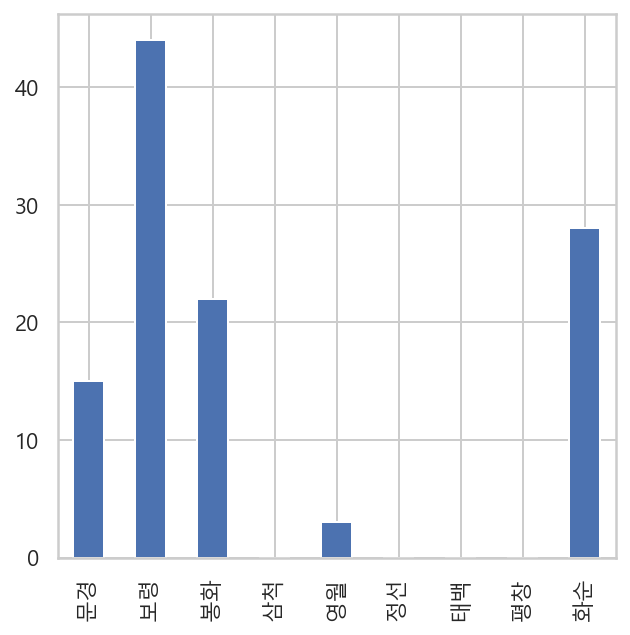

In [54]:
mart_add.plot.bar(figsize=(5,5))

# 주차장

In [55]:
# 지역별 주차장 데이터
mk_pl = pd.read_csv("문경주차장.csv", encoding='cp949')
br_pl = pd.read_csv("보령주차장.csv", encoding='cp949')
bh_pl = pd.read_csv("봉화주차장.csv",encoding='cp949')
sc_pl = pd.read_csv("삼척주차장.csv", encoding='cp949')
yw_pl = pd.read_csv("영월주차장.csv", encoding='cp949')
js_pl = pd.read_csv("정선주차장.csv", encoding='cp949')
tb_pl = pd.read_csv("태백주차장.csv",encoding='cp949')
pc_pl = pd.read_csv("평창주차장.csv", encoding='cp949')
hs_pl = pd.read_csv("화순주차장.csv", encoding='cp949')

In [56]:
mk_pl['시군'] = '문경_1'
br_pl['시군'] = '보령_2'
bh_pl['시군'] = '봉화_3'
sc_pl['시군'] = '삼척_4'
yw_pl['시군'] = '영월_5'
js_pl['시군'] = '정선_6'
tb_pl['시군'] = '태백_7'
pc_pl['시군'] = '평창_8'
hs_pl['시군'] = '화순_9'

parkinglot = pd.concat([mk_pl, br_pl, bh_pl, sc_pl, yw_pl,
                  js_pl, tb_pl, pc_pl, hs_pl])

parkinglot = parkinglot[['주차장명', '주차구획수', '위도','경도','시군']]
parkinglot = parkinglot.reset_index(drop=True)
parkinglot

,주차장명,주차구획수,위도,경도,시군
0,제1공영주차장,49,36.586106,128.192314,문경_1
1,제2공영주차장,170,36.594074,128.201804,문경_1
2,제3공영주차장,78,36.595359,128.200679,문경_1
3,제4공영주차장,46,36.595411,128.202804,문경_1
4,제5공영주차장,39,36.600991,128.206369,문경_1
...,...,...,...,...,...
562,향청리공영주차장,123,35.062349,126.987393,화순_9
563,오일시장주차장,48,35.060953,126.984538,화순_9
564,오일시장내주차장,78,35.058343,126.983139,화순_9
565,이양면주차장,31,34.889717,126.988265,화순_9


In [57]:
# 주차장 칸수 평균
parkinglot_m = round(parkinglot['주차구획수'].mean())
parkinglot_m

51

In [58]:
pl_count = []            # 주차장 개수 리스트
pl_need = res_need       # 주차장 적정 개수 리스트
for i in range(1,10):
    i = str(i)
    a = parkinglot[(parkinglot['시군'].str.contains(i))]
    pl_count.append(a.shape[0])
    a = a.reset_index(drop=True)
    i = int(i)

print("주차장 현재 개수: ",pl_count)
print("주차장 적정 개수",pl_need)

주차장 현재 개수:  [52, 53, 54, 14, 153, 54, 70, 107, 10]
주차장 적정 개수 [28, 39, 12, 25, 15, 14, 16, 16, 24]


In [59]:
# 시군 별로 추가로 필요한 주차장 수
pl_add = []
for i in range(9):
    if pl_count[i]-pl_need[i]>= 0:
        pl_add.append(0)
    else:
        pl_add.append(pl_need[i]-pl_count[i])

pl_add = Series(data=pl_add, index=index_list)
pl_add

문경     0
보령     0
봉화     0
삼척    11
영월     0
정선     0
태백     0
평창     0
화순    14
dtype: int64

<AxesSubplot:>

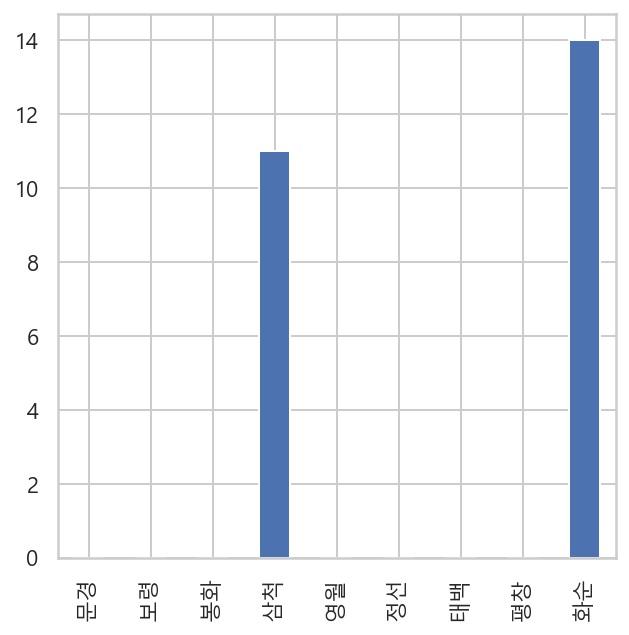

In [60]:
pl_add.plot.bar(figsize=(5,5))

In [61]:
add = pd.DataFrame({'unused_land': land_count,
                   'hotel':hotel_add,
                   'restaurant': res_add,
                   'park': park_add,
                   'mart': mart_add,
                   'parking_lot': pl_add})
add

,unused_land,hotel,restaurant,park,mart,parking_lot
문경,6,48.0,0,12.0,15,0
보령,5,0.0,5,15.0,44,0
봉화,6,13.0,0,2.0,22,0
삼척,252,39.0,0,0.0,0,11
영월,65,0.0,0,0.0,3,0
정선,100,0.0,0,0.0,0,0
태백,231,0.0,0,0.0,0,0
평창,4,0.0,0,0.0,0,0
화순,32,90.0,0,0.0,28,14


In [62]:
add.loc['문경','hotel':][2]

12.0

<AxesSubplot:>

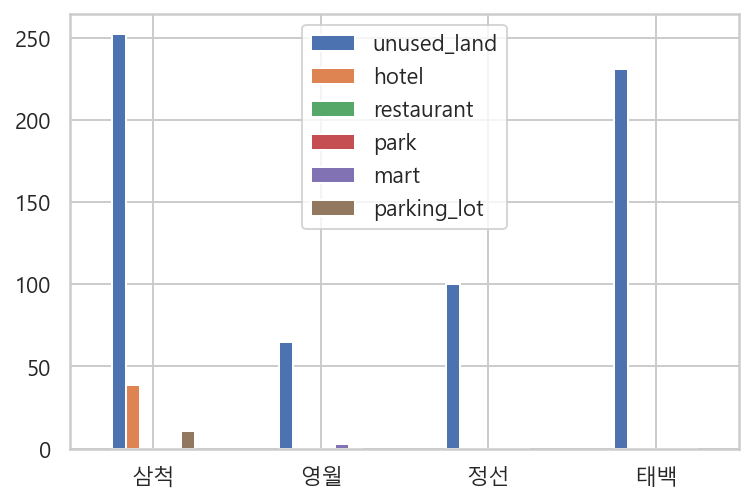

In [63]:
add[3:7].plot.bar(rot=0)

<AxesSubplot:>

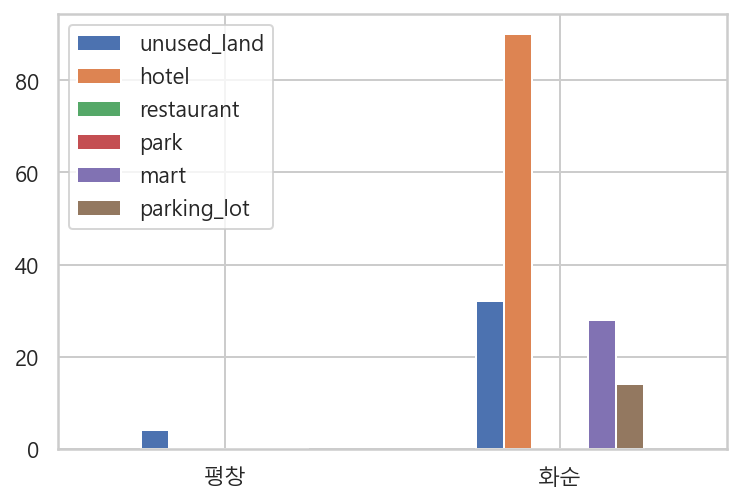

In [64]:
add[7:10].plot.bar(rot=0)

### -> 문경 : 숙박시설, 편의점, 공원 중 선택
### -> 보령 : 식당, 편의점, 공원 중 선택
### -> 봉화 : 숙박시설, 편의점, 공원 중 선택
### -> 삼척 : 호텔, 편의점 건설. 남은 유휴지 많음.
### -> 영월 : 편의점 걸설. 남은 유효지 많음
### -> 정선 : 필요시설 없음
### -> 태백 : 필요시설 없음
### -> 평창 : 필요시설 없음
### -> 화순 : 숙박시설, 편의점, 주차장 중 선택


<AxesSubplot:>

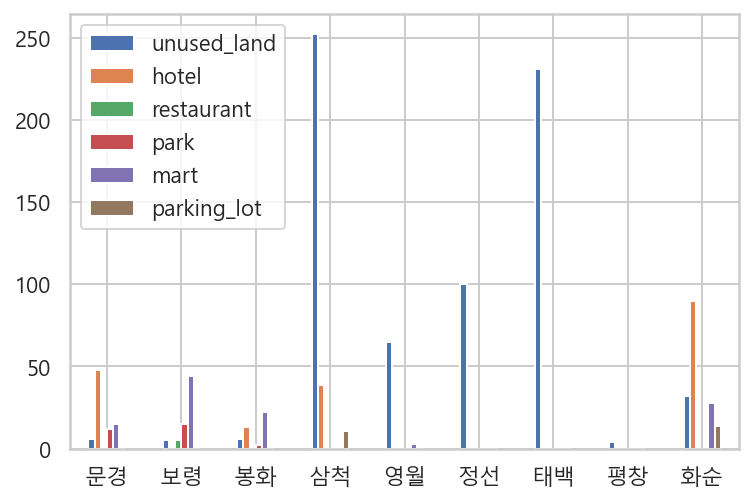

In [65]:
add.plot.bar(rot=0)